<a href="https://colab.research.google.com/github/bruh7463/data_mining_project_team_14/blob/main/data_mining_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
  <font size=6><b>CSC 4792: Data Mining and Warehousing</b></font><br />
  <font size=3>Group Project: Classify country of origin for Wikipedia user contributions on Zambian Wikipedia pages</font>

   <b>Group Members</b> </br>
   Simon Chanda </br>
   Lawrence Chitandula </br>
   Chilufya Chulu </br>
   Kasweka Michael Mukoko </br>
   Mike Shatamuka </br>
</center>


# **1. Business Understanding**
### Problem Statement
Wikipedia pages related to Zambia have fewer local contributions than international ones. There is little understanding of where the contributors of Zambian-related pages come from, including the Zambia page. Without this information, it is difficult to create specific strategies that boost contributions from Zambian Wikipedians. The goal is to find out and categorize the origins of Wikipedia users who contribute to Zambian pages. This will help in planning actions that promote more local involvement.

### Business Objectives
- Identify the percentage of contributions to Zambian Wikipedia articles by users from Zambia compared to other nations.
- Provide practical advice to guide strategies for Zambian-based contributions.
- Support The University of Zambia's DataLab Research Group in advocating for greater representation of local perspectives on Wikipedia.
- Enable long-term monitoring of contribution by country of origin.

### What Success Looks Like In Practice
- An unambiguous evidence based report on the contributions by country.
- It was possible to identify trends of where most of edits are made.
- Lessons that could be shared with Wikimedia communities and policymakers incase of encouraging locals to contribute.

### Data Mining Goals
- Create a prediction model that can determine the most likely country of origin for each Wikipedia edit made to Zambian pages, using details like the user’s IP address (for anonymous edits), profile information, and the timing of edits.

- Analyze and visualize the data to show clear summaries of how contributions are distributed by country.


### Initial Project Success Criteria

- Produce a clear and accurate breakdown of Wikipedia contributions to Zambian pages by country of origin.
- Achieve at least 80% accuracy in classifying the country of origin for contributions.
- Visualize contribution patterns and trends over time through interpretable dashboards or charts.
- Provide actionable insights that can guide strategies to increase local Zambian participation.



# **2. Data Understanding**

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
import pandas as pd

# Load CSV
file_path = "/content/drive/MyDrive/Dataset/zambia_wikipedia_history.csv"
df = pd.read_csv(file_path)

# We will work with a copy for the data understanding phase
df_data = df.copy()

# Preview dataset
print("Dataset Shape:", df_data.shape)
df_data.head()

Dataset Shape: (12990, 10)


,page_id,title,rev_id,timestamp,contributor_id,contributor_name,contributor_ip,comment,minor,text_length
0,15643,Zambia,66041,2005-10-31T08:48:31Z,NaN,"User(id=1734, text='Ianleow7')",NaN,Creating article.,False,1617
1,15643,Zambia,66727,2005-11-05T06:07:50Z,NaN,"User(id=1110, text='Ricky81682')",NaN,rm unused cat,False,1577
2,15643,Zambia,100931,2006-02-14T12:33:52Z,NaN,"User(id=None, text='81.204.151.102')",NaN,NaN,False,2211
3,15643,Zambia,100964,2006-02-14T15:58:40Z,NaN,"User(id=2131, text='Archer7')",NaN,corrected formatting,False,2219
4,15643,Zambia,100987,2006-02-14T16:17:15Z,NaN,"User(id=2077, text='Freshstart')",NaN,"typos, full names",True,2273


- The dataset contains 12990 rows and 10 columns.

- First look shows columns like: title, rev_id, timestamp, contributor, text_length.

- Data seems to have both text and numeric attributes.

In [123]:
# [DU] Lawrence — Dataset Info and Descriptive Statistics

# Show dataset structure
df_data.info()

# Show summary statistics
df_data.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12990 entries, 0 to 12989
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           12990 non-null  int64  
 1   title             12990 non-null  object 
 2   rev_id            12990 non-null  int64  
 3   timestamp         12990 non-null  object 
 4   contributor_id    0 non-null      float64
 5   contributor_name  12990 non-null  object 
 6   contributor_ip    0 non-null      float64
 7   comment           10726 non-null  object 
 8   minor             12990 non-null  bool   
 9   text_length       12990 non-null  int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 926.2+ KB


,page_id,title,rev_id,timestamp,contributor_id,contributor_name,contributor_ip,comment,minor,text_length
count,1.299000e+04,12990,1.299000e+04,12990,0.0,12990,0.0,10726,12990,12990.000000
unique,NaN,73,NaN,12983,NaN,4846,NaN,6817,2,NaN
top,NaN,Zambia,NaN,2022-07-17T04:33:46Z,NaN,"User(id=43730508, text='Ezyg8')",NaN,/* History */,False,NaN
freq,NaN,6150,NaN,4,NaN,687,NaN,266,9614,NaN
mean,4.229965e+06,NaN,6.008561e+08,NaN,NaN,NaN,NaN,NaN,NaN,49411.398691
std,1.244498e+07,NaN,4.024507e+08,NaN,NaN,NaN,NaN,NaN,NaN,45331.197140
min,1.564300e+04,NaN,4.909500e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,3.441500e+04,NaN,2.313226e+08,NaN,NaN,NaN,NaN,NaN,NaN,15286.000000
50%,3.442900e+04,NaN,5.674602e+08,NaN,NaN,NaN,NaN,NaN,NaN,37797.500000
75%,1.472509e+06,NaN,9.617695e+08,NaN,NaN,NaN,NaN,NaN,NaN,70054.000000


- The dataset contains **12990 rows** and **10 columns**.  
- The **`contributor_id`** and **`contributor_ip`** columns have **100% missing values** (no records available).  
- The **`timestamp`** column is stored as an object type and needs conversion to datetime for proper time-based analysis.  
- The **`text_length`** column is complete for all entries and shows variation in article sizes.  
- Some columns, such as **`comment`** and **`contributor_name`**, have high cardinality (many unique values).  


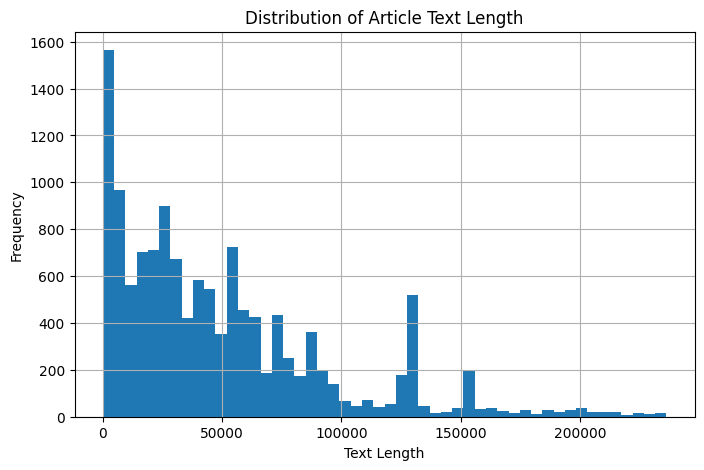

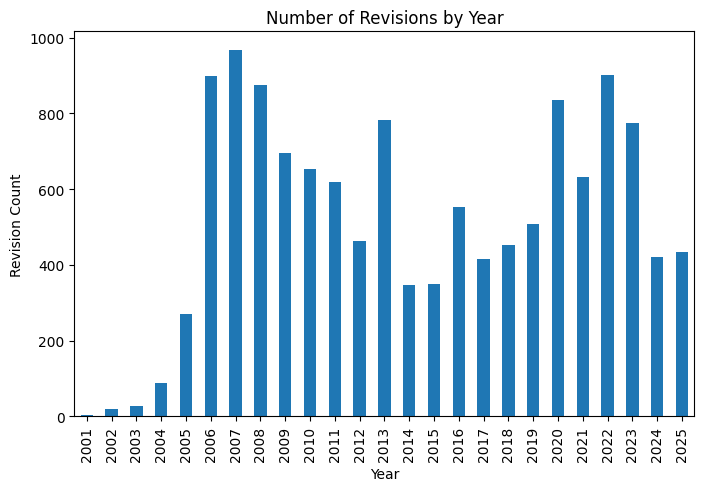

In [124]:
# [DU] Mike - Numerical Visualizations
import matplotlib.pyplot as plt

# Convert timestamp to datetime
df_data["timestamp"] = pd.to_datetime(df_data["timestamp"], errors="coerce")

# Histogram of text length
plt.figure(figsize=(8,5))
df["text_length"].hist(bins=50)
plt.title("Distribution of Article Text Length")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

# Revisions by year
plt.figure(figsize=(8,5))
df_data["timestamp"].dt.year.value_counts().sort_index().plot(kind="bar")
plt.title("Number of Revisions by Year")
plt.xlabel("Year")
plt.ylabel("Revision Count")
plt.show()

* Article text lengths are heavily right-skewed; the bulk of articles are relatively short, concentrated below roughly 50k characters, with frequency tapering off as length increases.
* Revision activity shows two waves: the highest peak is in the mid-2000s (around 2007), with a secondary surge in 2020-2023 (notably 2022).
* The distribution has a long right tail with clear outliers, including some articles exceeding 200k characters.


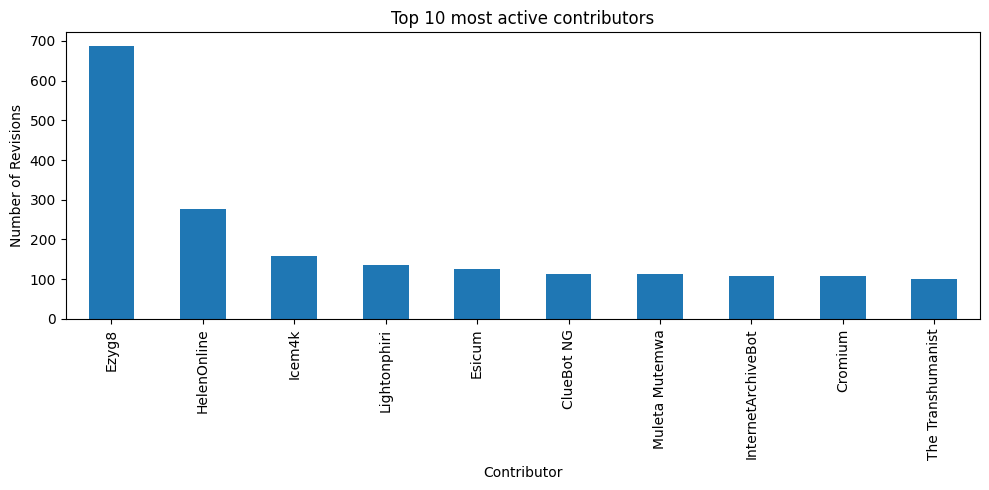

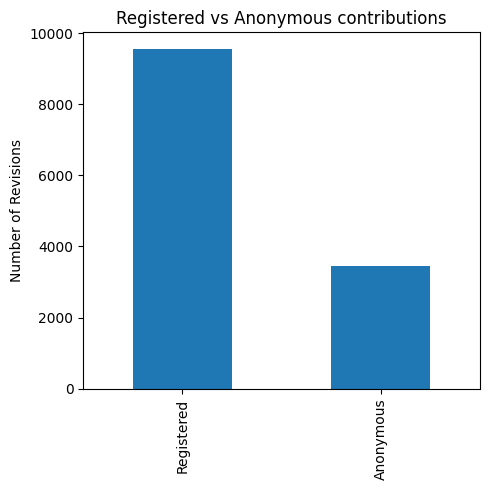

Top contributor is Ezyg8 with 687 revisions
Anonymous contributors account for 26.5% of all edits


In [125]:
# [DU] Chilufya - Contributor Analysis

def get_user_text(s):
    # Extract what's inside text='...'
    if isinstance(s, str) and "text='" in s:
        return s.split("text='", 1)[1].split("'", 1)[0]
    return None

def is_ipv4_like(s):
    # Require exactly four numeric parts separated by dots
    if not isinstance(s, str):
        return False
    parts = s.split('.')
    if len(parts) != 4:
        return False
    return all(p.isdigit() for p in parts)

# Extract a readable contributor label
df_data['user_text'] = df_data['contributor_name'].apply(get_user_text)

# Anonymous if id=None appears OR the extracted text is IPv4-like
df_data['is_anonymous'] = (
    df_data['contributor_name'].apply(lambda s: isinstance(s, str) and "id=None" in s) |
    df_data['user_text'].apply(is_ipv4_like)
)

# Top 10 contributors
top_contributors = df_data['user_text'].dropna().value_counts().head(10)

plt.figure(figsize=(10, 5))
top_contributors.plot(kind="bar")
plt.title("Top 10 most active contributors")
plt.xlabel("Contributor")
plt.ylabel("Number of Revisions")
plt.tight_layout()
plt.show()

# --- Registered vs Anonymous contributors ---
anon_counts = (
    df_data['is_anonymous']
      .map({False: "Registered", True: "Anonymous"})
      .value_counts()
      .reindex(["Registered", "Anonymous"], fill_value=0)
)

plt.figure(figsize=(5, 5))
anon_counts.plot(kind="bar")
plt.title("Registered vs Anonymous contributions")
plt.xlabel("")
plt.ylabel("Number of Revisions")
plt.tight_layout()
plt.show()

# Print required statistics
top_contributor_name = top_contributors.index[0]
top_contributor_count = top_contributors.iloc[0]
anonymous_percentage = df_data['is_anonymous'].mean() * 100

print(f"Top contributor is {top_contributor_name} with {top_contributor_count} revisions")
print(f"Anonymous contributors account for {anonymous_percentage:.1f}% of all edits")

* Top contributor is Ezy98 with just under 700 revisions.
* Anonymous contributors account for roughly a quarter of all edits (~25-30%); registered users make up the majority.
* Editing is concentrated among a small group: Ezy98 far outpaces others (the next, Helenonline, has ~280), with most of the remaining top contributors around 100-160 revisions.

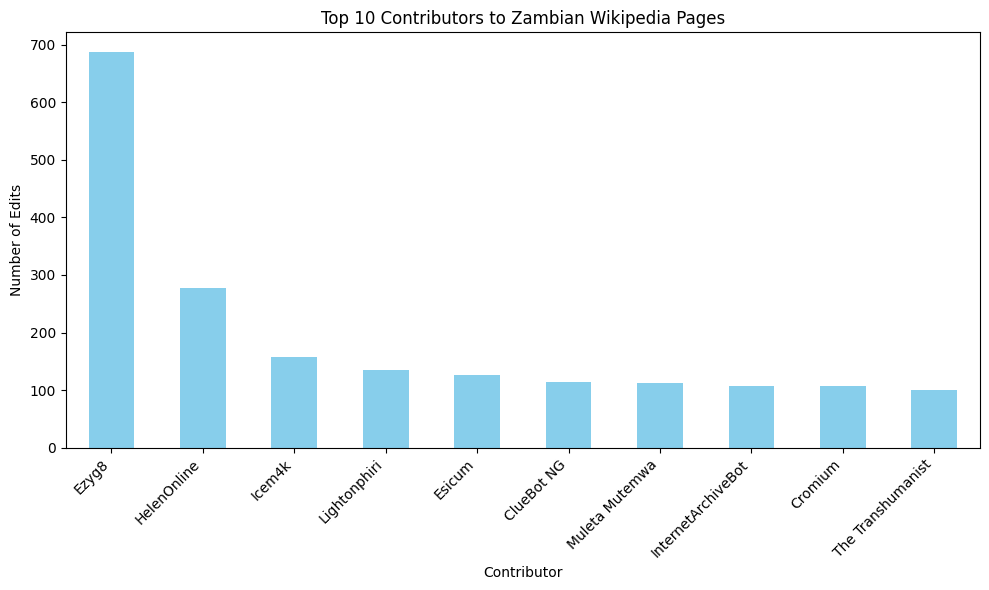

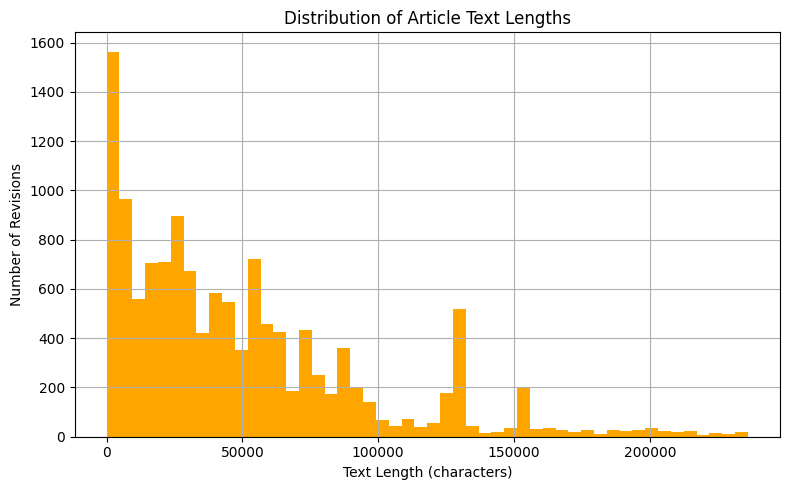

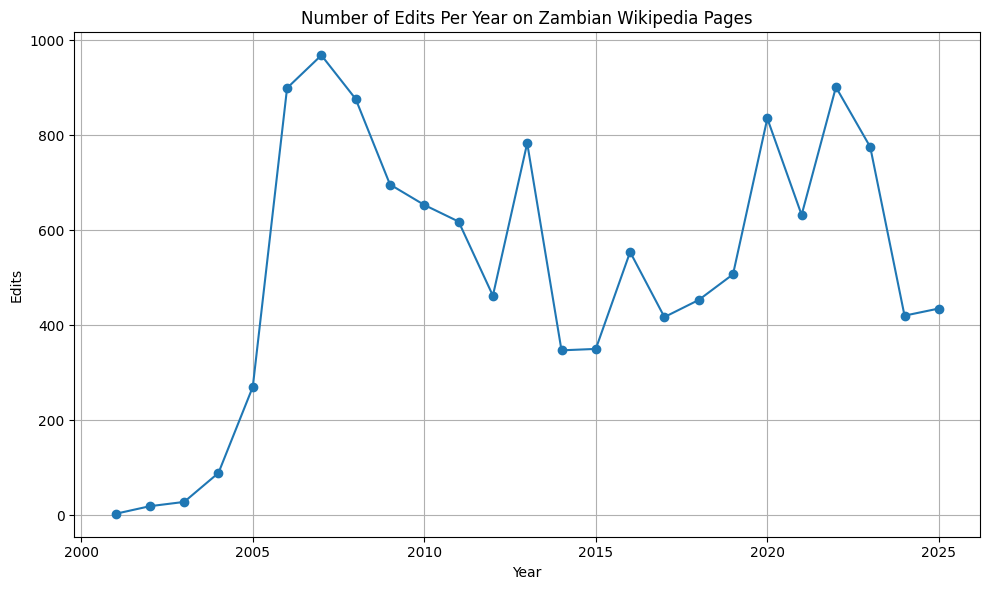

In [126]:
# [DU] Michael  - Summary of Data Understanding

# 1. Top 10 contributors (by number of edits)
top_contributors = df_data['user_text'].dropna().value_counts().head(10)

plt.figure(figsize=(10,6))
top_contributors.plot(kind="bar", color="skyblue")
plt.title("Top 10 Contributors to Zambian Wikipedia Pages")
plt.xlabel("Contributor")
plt.ylabel("Number of Edits")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# 2. Distribution of text length (histogram)
plt.figure(figsize=(8,5))
df_data["text_length"].hist(bins=50, color="orange")
plt.title("Distribution of Article Text Lengths")
plt.xlabel("Text Length (characters)")
plt.ylabel("Number of Revisions")
plt.tight_layout()
plt.show()


# 3. Edits over time (timeline)
df_data["timestamp"] = pd.to_datetime(df_data["timestamp"], errors="coerce")
edits_per_year = df_data["timestamp"].dt.year.value_counts().sort_index()

plt.figure(figsize=(10,6))
edits_per_year.plot(kind="line", marker="o")
plt.title("Number of Edits Per Year on Zambian Wikipedia Pages")
plt.xlabel("Year")
plt.ylabel("Edits")
plt.grid(True)
plt.tight_layout()
plt.show()

## Summary of Data Understanding
* Dataset size : 12990 Rows and 10 Columns
* Missing data: contributor field has many missing/unknown values.
* Numerical insights: Article text lengths are heavily right-skewed; most revisions are on pages under ~60k characters, with a long tail and outliers beyond 200k.
* Temporal insights: Two major activity waves — peak around 2006-2007 (highest ~950-980 edits) and another surge in 2020-2022 (peaking ~900), with dips around 2014-2015 and in 2024-2025.
* Categorical insights: Editing is concentrated among a small set of accounts. Ezy98 leads with just under 700 edits; HelenOnline is next (~280); others in the top 10 contribute ~100–160 each. Bot accounts (e.g., ClueBot NG, InternetArchiveBot) appear among the top contributors.
* Potential issues: strong right‑skew and outliers in text length, temporal imbalance across years, heavy contributor concentration (and bot influence), and incomplete contributor metadata.

Next Steps:
* Clean contributor field (resolve anonymous/unknown users).
* Engineer new features (year of revision, registered vs anonymous).
* Explore external data sources to infer country of origin from contributor metadata (not available
directly).

#  **3. Data Preparation**

 The contributor_ip column is entirely null and provides no value,
so it can be removed. Missing comments can be treated as empty strings to
ensure consistency without losing any rows of data.


In [127]:
 # Drop the empty 'contributor_ip' and ‘contributor_id’ columns
 df.drop(columns=['contributor_ip'], inplace=True)
 df.drop(columns=['contributor_id'], inplace=True)
 # Fill missing values in the 'comment' column with an empty string
 df['comment'].fillna('', inplace=True)
 print("Columns after dropping 'contributor_ip':", df.columns)
 print("\nNull values in 'comment' column after filling:", df['comment'].isnull().sum())

Columns after dropping 'contributor_ip': Index(['page_id', 'title', 'rev_id', 'timestamp', 'contributor_name',
       'comment', 'minor', 'text_length'],
      dtype='object')

Null values in 'comment' column after filling: 0


/tmp/ipython-input-1925558925.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['comment'].fillna('', inplace=True)


Converting timestamp to a datetime object is essential for
performing time-series analysis and extracting features like the hour of the day The minor column should be a boolean (True/False) instead of a string forefficiency and compatibility with machine learning models.

In [128]:
 # Convert 'timestamp' to datetime objects
 df['timestamp'] = pd.to_datetime(df['timestamp'])
 # Convert 'minor' from string to boolean
 df['minor'] = df['minor'].apply(lambda x: True if x == 'TRUE' else False)
 print("Data type of 'timestamp' column:", df['timestamp'].dtype)
 print("Data type of 'minor' column:", df['minor'].dtype)

Data type of 'timestamp' column: datetime64[ns, UTC]
Data type of 'minor' column: bool


The time of an edit can be a strong indicator of the contributor's
timezone. Analyzing patterns in edit times (e.g., edits during Zambian
business hours) can help in our classification goal

In [129]:
# Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Now extract hour and day of week
df['edit_hour'] = df['timestamp'].dt.hour
df['edit_day_of_week'] = df['timestamp'].dt.dayofweek

print(df[['timestamp', 'edit_hour', 'edit_day_of_week']].head())


                  timestamp  edit_hour  edit_day_of_week
0 2005-10-31 08:48:31+00:00          8                 0
1 2005-11-05 06:07:50+00:00          6                 5
2 2006-02-14 12:33:52+00:00         12                 1
3 2006-02-14 15:58:40+00:00         15                 1
4 2006-02-14 16:17:15+00:00         16                 1


Many edits are automated and not representative of human
contributors. Identifying these allows us to filter them out or treat them as a
distinct category, preventing them from skewing our model.

In [130]:
 # Identify bot edits based on comment text
 bot_keywords = ['robot', 'bot', 'awb']

df['is_bot_edit'] = df['comment'].fillna('').str.lower().apply(
    lambda x: any(keyword in x for keyword in bot_keywords)
)
print("Number of bot edits identified:", df['is_bot_edit'].sum())
print(df[df['is_bot_edit']][['comment']].head())

Number of bot edits identified: 1386
                                              comment
6                 Robot: Adding [[African countries]]
9   robot  Adding: am, az, bs, el, fa, ilo, ka, ku...
10                      robot  Adding: [[vo:SambÃ¤n]]
11       robot  Adding: [[ast:Zambia]], [[qu:Sambya]]
12                   robot  Modifying: [[qu:Sambiya]]


Distinguishing between registered users and anonymous IP-based users is vital because IP addresses can potentially be geolocated, providing a direct signal for our origin classification model. So we are going to write a function to parse the contributor_name string to determine if
the user is anonymous (IP-based) or registered, and to extract their clean
username or IP address. We will create two new columns: is_ip_user and
clean_contributor_name.

In [131]:
import re

def parse_contributor(name_str):
  # Regex to find IP addresses
  ip_match = re.search(r"text='([\d\.:a-fA-F]+)'", str(name_str))
  if ip_match:
    return True, ip_match.group(1)

  # Regex for registered usernames
  user_match = re.search(r"text='([^']+)'", str(name_str))
  if user_match:
    return False, user_match.group(1)

  return False, None

# Apply the function to the dataframe
parsed_data = df['contributor_name'].apply(parse_contributor)
df['is_ip_user'] = parsed_data.apply(lambda x: x[0])
df['clean_contributor_name'] = parsed_data.apply(lambda x: x[1])
print(df[['contributor_name', 'is_ip_user', 'clean_contributor_name']].head())

                       contributor_name  is_ip_user clean_contributor_name
0        User(id=1734, text='Ianleow7')       False               Ianleow7
1      User(id=1110, text='Ricky81682')       False             Ricky81682
2  User(id=None, text='81.204.151.102')        True         81.204.151.102
3         User(id=2131, text='Archer7')       False                Archer7
4      User(id=2077, text='Freshstart')       False             Freshstart


The raw text_length only shows the size of the article after an edit.
The change in length is a much better feature, as it quantifies the contribution of a specific edit, distinguishing minor typo fixes from major content additions.

In [132]:

# Sort data to ensure correct chronological order for diff calculation
df.sort_values(by=['page_id', 'timestamp'], inplace=True)

# Calculate the difference in text length from the previous revision of the same page
df['text_length_change'] = df.groupby('page_id')['text_length'].diff().fillna(df['text_length'])

print(df[['title', 'timestamp', 'text_length', 'text_length_change']].head())

    title                 timestamp  text_length  text_length_change
0  Zambia 2005-10-31 08:48:31+00:00         1617              1617.0
1  Zambia 2005-11-05 06:07:50+00:00         1577               -40.0
2  Zambia 2006-02-14 12:33:52+00:00         2211               634.0
3  Zambia 2006-02-14 15:58:40+00:00         2219                 8.0
4  Zambia 2006-02-14 16:17:15+00:00         2273                54.0


Machine learning models require numerical inputs, so converting
boolean flags to binary integers is a standard and necessary step

In [133]:
# Convert boolean columns to integers (0 or 1)
bool_cols = ['minor', 'is_ip_user', 'is_bot_edit']
for col in bool_cols:
  df[col] = df[col].astype(int)

print(df[bool_cols].head())

   minor  is_ip_user  is_bot_edit
0      0           0            0
1      0           0            0
2      0           1            0
3      0           0            0
4      0           0            0


The title column contains page names, which are categorical. Onehot
encoding creates new binary columns for each page, allowing the model to
use this information without assuming a false sense of order or ranking
between the pages.

In [134]:
# Perform one-hot encoding on the 'title' column
title_dummies = pd.get_dummies(df['title'], prefix='page')
# Concatenate the new dummy variables with the original dataframe
df_prepared = pd.concat([df, title_dummies], axis=1)
# We can now drop the original 'title' column as it has been encoded
df_prepared.drop('title', axis=1, inplace=True)
print("Shape of the prepared dataframe:", df_prepared.shape)
print("New 'page' columns:", [col for col in df_prepared.columns if 'page_' in col])

Shape of the prepared dataframe: (12990, 86)
New 'page' columns: ['page_id', 'page_2021 Zambian general election', 'page_A history of Zambia', 'page_Abolition of Forced Labour Convention', 'page_Abuja Treaty', "page_African Charter on Human and Peoples' Rights", 'page_African Charter on the Rights and Welfare of the Child', 'page_African Convention on the Conservation of Nature and Natural Resources', 'page_Angolans in Zambia', 'page_Bangweulu Batwa', 'page_Bank of Zambia', 'page_British diaspora in Africa', 'page_COVID-19 pandemic in Zambia', 'page_Central Province, Zambia', 'page_Chalo Chatu', 'page_Childbirth in Zambia', 'page_Chitimukulu', 'page_Chokwe people', 'page_Corruption in Zambia', 'page_Demographics of Zambia', 'page_Disability in Zambia', 'page_Eastern Lunda', 'page_Eastern Province, Zambia', 'page_Economy of Zambia', 'page_First Lady of Zambia', 'page_Flag of Zambia', 'page_Football Association of Zambia', 'page_History of Zambia', 'page_Human interactions with insects i

# **4. Modeling**

In this phase, we build a model to classify edits as Zambian or non-Zambian. We will use our labeled data (from IPs and user pages) to train a supervised learning algorithm. The process involves preparing the data, splitting it for training and testing, and then training the model.

Our modeling strategy begins with the most direct evidence available: the IP addresses of anonymous editors. This first model is a Direct Geolocation Classifier. We will apply this model to all anonymous, human-edited revisions in our dataset. This will form the first layer of our unified inferred_country column. A critical initial step is to filter out all bot edits to ensure we are only analyzing human behavior.

In [135]:
!pip install geoip2
print("Applying Geolocation Model to Anonymous Users")

import geoip2.database
from tqdm import tqdm
tqdm.pandas()

# --- Part 1: Load the local GeoIP database ---
db_path = '/content/drive/MyDrive/Dataset/GeoLite2-Country.mmdb'
reader = None

try:
    reader = geoip2.database.Reader(db_path)
    print(f"Successfully loaded GeoIP database from: {db_path}")
except FileNotFoundError:
    print(f"FATAL ERROR: The GeoIP database file was not found at '{db_path}'.")
    # Handle the error as needed, e.g., exit()

def get_country_from_ip_local(ip, reader):
    """
    Looks up an IP in the local GeoIP database. Returns country name on success,
    or 'Lookup Failed' if any error occurs.
    """
    try:
        # Attempt to get the country from the database.
        response = reader.country(ip)
        return response.country.name
    except Exception:
        # If ANY error happens, return a generic failure message.
        return 'Lookup Failed'

if reader:
    human_edits_df = df_prepared[df_prepared['is_bot_edit'] == 0].copy()
    print(f"Filtered out bot edits. Total human edits to analyze: {len(human_edits_df)}")

    human_edits_df['inferred_country'] = None
    anonymous_mask = (human_edits_df['is_ip_user'] == 1)

    # Apply the simple function. The logic here doesn't change.
    human_edits_df.loc[anonymous_mask, 'inferred_country'] = human_edits_df.loc[anonymous_mask, 'clean_contributor_name'].progress_apply(
        lambda ip: get_country_from_ip_local(ip, reader)
    )

    # Count how many failed
    failed_count = (human_edits_df['inferred_country'] == 'Lookup Failed').sum()
    print(f"\nFound {failed_count} users with 'Lookup Failed'. Removing them.")

    # The one-liner to remove the rows
    human_edits_df = human_edits_df[human_edits_df['inferred_country'] != 'Lookup Failed'].copy()

    print("Removal complete.")

    print(f"\nLocal geolocation complete. Classified {human_edits_df['inferred_country'].notna().sum()} anonymous users.")

    # --- Part 4: Close the database reader ---
    reader.close()
    print("GeoIP database reader closed.")

Applying Geolocation Model to Anonymous Users
Successfully loaded GeoIP database from: /content/drive/MyDrive/Dataset/GeoLite2-Country.mmdb
Filtered out bot edits. Total human edits to analyze: 11604


100%|██████████| 3454/3454 [00:00<00:00, 19970.15it/s]


Found 21 users with 'Lookup Failed'. Removing them.
Removal complete.

Local geolocation complete. Classified 3433 anonymous users.
GeoIP database reader closed.


 The second stage of our model targets registered users. Many users self-declare their
location on their personal 'User Page' on Wikipedia. We will build a User Page Scraper that
uses the Wikipedia API to fetch and analyze the content of these pages for location keywords
(e.g., 'from Zambia', 'lives in Lusaka'). This model will fill in the inferred_country for
registered users where this direct evidence is available.


In [136]:
# Model for Registered Users with Declared Location
print("Applying User Page Scraper to Registered Users")

# Install library for Wikipedia API access
!pip install wikipedia-api

import wikipediaapi
from concurrent.futures import ThreadPoolExecutor, as_completed
import re

# Initialize the API with a custom user agent
wiki_api = wikipediaapi.Wikipedia('project_team_14', 'en')

def get_country_from_userpage(username):
    # Fetch the user page
    user_page = wiki_api.page(f"User:{username}")
    if not user_page.exists():
        return None
    # Simple regex to find mentions of Zambia and return the full name
    if re.search(r'\b(Zambia|Lusaka|Kitwe|Ndola|Kabwe|Livingstone|Chipata|Solwezi|Mongu)\b', user_page.text, re.IGNORECASE):
        return 'Zambia'
    return None

# Apply this scraper ONLY to registered users who do NOT yet have an inferred country
registered_mask = (human_edits_df['is_ip_user'] == 0) & (human_edits_df['inferred_country'].isna())
users_to_scrape = human_edits_df.loc[registered_mask, 'clean_contributor_name'].unique()

print(f"Scraping user pages for {len(users_to_scrape)} unique registered users...")

# Run requests in parallel
user_country_map = {}
with ThreadPoolExecutor(max_workers=5) as executor:
    futures = {executor.submit(get_country_from_userpage, user): user for user in users_to_scrape}
    for future in tqdm(as_completed(futures), total=len(futures)):
        user = futures[future]
        result = future.result()
        if result:
            user_country_map[user] = result

# Apply this mapping to our main DataFrame
human_edits_df['inferred_country'] = human_edits_df['inferred_country'].fillna(human_edits_df['clean_contributor_name'].map(user_country_map))

print(f"\nUser page scraping complete. Total classified users is now: {human_edits_df['inferred_country'].notna().sum()}")

Applying User Page Scraper to Registered Users
Scraping user pages for 2419 unique registered users...


100%|██████████| 2419/2419 [01:21<00:00, 29.60it/s]


User page scraping complete. Total classified users is now: 3816


First, we prepare the data for the model. We filter for only the labeled edits and then define our **features (X)**—the input variables like `edit_hour`—and our **target (y)**—the output `is_zambian` column that we want to predict.

In [137]:
# Preparing Data for Supervised Learning

print("--- Preparing Data for Modeling ---")

# Create the dataset for training.
# We can only train a model on the data we have already labeled (from IPs and user pages).
train_df = human_edits_df[human_edits_df['inferred_country'].notna()].copy()

# Create the binary target variable 'is_zambian'.
# The model needs a simple numerical target to predict: 1 for Zambian, 0 for not Zambian.
train_df['is_zambian'] = (train_df['inferred_country'] == 'Zambia').astype(int)

print("Class distribution in the labeled dataset:")
print(train_df['is_zambian'].value_counts(normalize=True))

# Define the features (X) and the target (y).
# We select the behavioral features we engineered earlier.
# The model will use these features to predict the target.
feature_cols = [
    'minor',
    'text_length',
    'edit_hour',
    'edit_day_of_week',
    'is_ip_user',
    'text_length_change'
]

X = train_df[feature_cols]
y = train_df['is_zambian']

print(f"\nData preparation complete. Defined X (features shape: {X.shape}) and y (target shape: {y.shape}).")


--- Preparing Data for Modeling ---
Class distribution in the labeled dataset:
is_zambian
0    0.839099
1    0.160901
Name: proportion, dtype: float64

Data preparation complete. Defined X (features shape: (3816, 6)) and y (target shape: (3816,)).


To properly evaluate our model, we split the data into two parts: an **80% training set** for the model to learn from, and a **20% testing set** to test its performance on unseen data. This prevents the model from simply memorizing the answers and gives us an unbiased performance score.

In [138]:
# Splitting Data for Training and Testing

from sklearn.model_selection import train_test_split

print("--- Splitting the Data ---")

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Data successfully split.")
print(f"Training set has {X_train.shape[0]} samples.")
print(f"Testing set has {X_test.shape[0]} samples.")


--- Splitting the Data ---
Data successfully split.
Training set has 3052 samples.
Testing set has 764 samples.


We are choosing a **Decision Tree Classifier** because it is highly interpretable meaning we can inspect its rules to understand how it makes decisions. This directly supports our business goal of gaining actionable insights. It also handles our mix of data types well without needing extra preprocessing like scaling.

In [139]:
# Model Selection and Training

from sklearn.tree import DecisionTreeClassifier

print("--- Selecting and Training the Model ---")

# Explanation of Algorithm Choice:

# Initialize the model.
dt_model = DecisionTreeClassifier(random_state=42)

# Step 2: Train the model.
dt_model.fit(X_train, y_train)

print("\nDecision Tree model has been successfully trained on the training data.")


--- Selecting and Training the Model ---

Decision Tree model has been successfully trained on the training data.


For the second model, we will **remove `is_ip_user`** from our list of features (`X2`). This forces our new model to base its predictions solely on behavioral patterns like edit time and text size.

In [140]:
# Preparing Data with Refined Features

print("--- Preparing Data for Improved Modeling ---")

# We use 'train_df2' and 'is_zambian' target as before.
train_df2 = human_edits_df[human_edits_df['inferred_country'].notna()].copy()
train_df2['is_zambian'] = (train_df2['inferred_country'] == 'Zambia').astype(int)

feature_cols2 = [
    'minor',
    'text_length',
    'edit_hour',
    'edit_day_of_week',
    'text_length_change'
]

X2 = train_df2[feature_cols2]
y2 = train_df2['is_zambian']

print(f"Data preparation complete. The model will now train on {len(feature_cols2)} behavioral features only.")
print("Features being used:", feature_cols2)

--- Preparing Data for Improved Modeling ---
Data preparation complete. The model will now train on 5 behavioral features only.
Features being used: ['minor', 'text_length', 'edit_hour', 'edit_day_of_week', 'text_length_change']


As before, we must split our data into training and testing sets. This step is unchanged but remains essential for ensuring we have an unbiased method to evaluate our new model's performance on data it has never seen. We will maintain the 80/20 split and use stratification to preserve the class balance.

In [141]:
# Splitting Data for Training and Testing

from sklearn.model_selection import train_test_split

print("--- Splitting the Refined Data ---")

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Data successfully split.")
print(f"Training set has {X2_train.shape[0]} samples.")
print(f"Testing set has {X2_test.shape[0]} samples.")

--- Splitting the Refined Data ---
Data successfully split.
Training set has 3052 samples.
Testing set has 764 samples.


To overcome the limitations of a single Decision Tree, we are now using a **Random Forest Classifier**. This is an "ensemble" algorithm that builds a large number of individual decision trees and combines their predictions. This approach is more robust because it averages out the biases of individual trees and is far less likely to be influenced by a single feature. This should result in a model that generalizes better and provides more reliable predictions across all user types.

In [142]:
# Training a Random Forest Model

from sklearn.ensemble import RandomForestClassifier

print("--- Selecting and Training the Random Forest Model ---")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Step 2: Train the model on the same training data.
# The model will learn from the behavioral features to predict the 'is_zambian' target.
rf_model.fit(X2_train, y2_train)

print("\nRandom Forest model has been successfully trained.")

--- Selecting and Training the Random Forest Model ---

Random Forest model has been successfully trained.


# **5. Evaluation**

The first step in evaluation is to use our trained model (`dt_model`) to make predictions on the test data (`X_test`). The model has never seen this data before. The output, `y_pred`, will be a series of 0s and 1s representing the model's guess for each edit in the test set. This prediction array is the foundation for all subsequent evaluation tasks.

In [143]:
# Making Predictions on the Test Set

print("--- Generating predictions on the unseen test data ---")

# Use the trained model's .predict() method on the test features
y_pred = dt_model.predict(X_test)

print(f"Predictions generated for all {len(y_test)} samples in the test set.")
print("The first 10 predictions are:", y_pred[:10])
print("The first 10 actual labels are:", y_test.values[:10])

--- Generating predictions on the unseen test data ---
Predictions generated for all 764 samples in the test set.
The first 10 predictions are: [1 0 0 0 0 0 0 0 1 0]
The first 10 actual labels are: [1 0 0 0 0 0 0 0 1 0]


With the predictions (`y_pred`), we can now quantify the model's performance. Our primary metric, as defined in the project's success criteria, is **accuracy**. We will also generate a **classification report**, which provides a deeper look at performance by showing the precision, recall, and F1-score for both the "Zambian" and "non-Zambian" classes.


In [144]:
# Calculating Core Performance Metrics

from sklearn.metrics import accuracy_score, classification_report

print("--- Calculating core performance metrics ---")

# Calculate overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Test Set: {accuracy:.2%}")

# Check against our success criterion
if accuracy >= 0.80:
    print("SUCCESS: The model meets the project's 80% accuracy criterion.")
else:
    print("NOTE: The model has not yet met the 80% accuracy criterion.")

# Generate the detailed classification report
print("\n--- Classification Report ---")
# 'target_names' makes the report easier to read
print(classification_report(y_test, y_pred, target_names=['Non-Zambian (0)', 'Zambian (1)']))


--- Calculating core performance metrics ---
Model Accuracy on Test Set: 93.59%
SUCCESS: The model meets the project's 80% accuracy criterion.

--- Classification Report ---
                 precision    recall  f1-score   support

Non-Zambian (0)       0.96      0.97      0.96       641
    Zambian (1)       0.82      0.77      0.79       123

       accuracy                           0.94       764
      macro avg       0.89      0.87      0.88       764
   weighted avg       0.93      0.94      0.94       764



While metrics give us numbers, a **confusion matrix** helps us visualize *where* the model is making mistakes. It breaks down the predictions into four categories: True Positives, True Negatives, False Positives, and False Negatives. This visualization makes it easy to see if the model is biased towards one class or if it struggles with a particular type of prediction.

--- Visualizing model errors with a confusion matrix ---


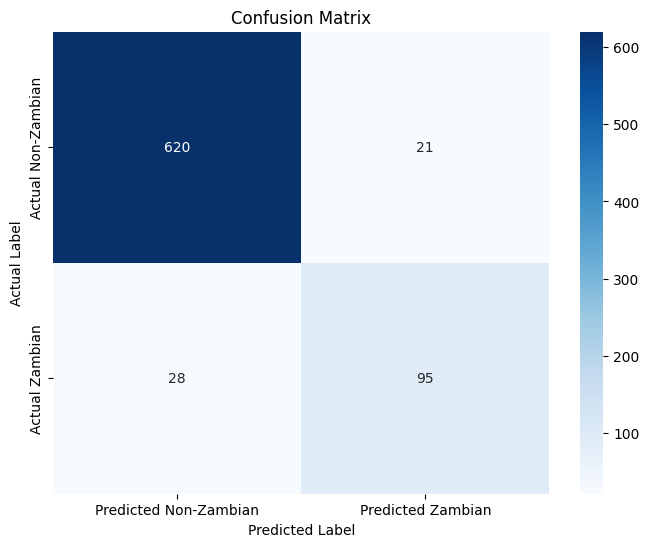

In [145]:
# Visualizing Model Errors

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Visualizing model errors with a confusion matrix ---")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Non-Zambian', 'Predicted Zambian'],
            yticklabels=['Actual Non-Zambian', 'Actual Zambian'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Beyond knowing *how* the model performed, we want to know *why*. Because we used a Decision Tree, we can inspect its **feature importances**. This tells us which features the model relied on most heavily to make its decisions. This is crucial for gaining the "actionable insights" our project aims for and for confirming if our hypotheses (e.g., about `edit_hour`) were correct.

--- Interpreting model decisions via feature importance ---


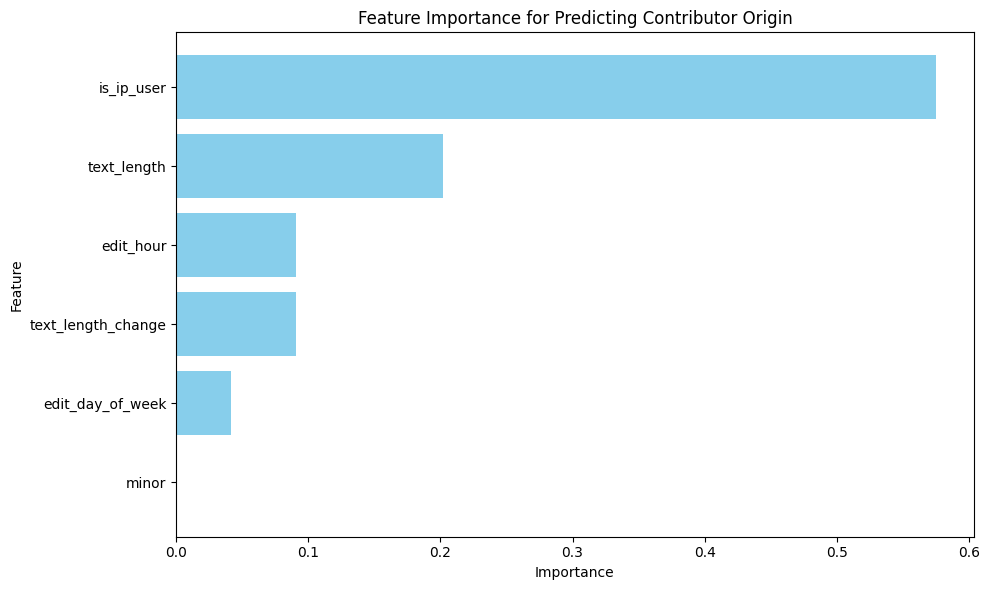

In [146]:
# Interpreting Model Logic with Feature Importance

print("--- Interpreting model decisions via feature importance ---")

# Extract feature importances from the trained model
importances = dt_model.feature_importances_

# Create a DataFrame for easy plotting
feature_importance_df = pd.DataFrame({
    'feature': feature_cols,
    'importance': importances
}).sort_values('importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Predicting Contributor Origin")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

The final step in our evaluation is to go one level deeper. We will analyze the specific edits that our model got wrong and then synthesize all our findings into a final conclusion.

**Error Analysis:** We will isolate two types of errors:
1.  **False Positives:** Edits the model *thought* were Zambian, but were not. (Predicted 1, Actual 0)
2.  **False Negatives:** Edits the model *missed*—actual Zambian edits that it classified as non-Zambian. (Predicted 0, Actual 1)

By examining the characteristics of these errors (e.g., their average `edit_hour` or `text_length`), we can understand the model's weaknesses. This analysis will be followed by a comprehensive written summary that assesses our model against the project's success criteria.


In [147]:
# Error Analysis Code

print("--- Performing Error Analysis ---")

# For easier analysis, let's create a temporary DataFrame with the test features, actual labels, and predictions
results_df = X_test.copy()
results_df['actual'] = y_test
results_df['predicted'] = y_pred

# Find all the rows where the model was wrong
misclassified = results_df[results_df['actual'] != results_df['predicted']]

print(f"The model misclassified a total of {len(misclassified)} edits.")

# Isolate the False Positives (Predicted Zambian, but was not)
false_positives_df = misclassified[misclassified['actual'] == 0]
print(f"\nNumber of False Positives: {len(false_positives_df)}")
print("Characteristics of False Positives:")
print(false_positives_df[feature_cols].describe())

# Isolate the False Negatives (Predicted Non-Zambian, but was Zambian)
false_negatives_df = misclassified[misclassified['actual'] == 1]
print(f"\nNumber of False Negatives: {len(false_negatives_df)}")
print("Characteristics of False Negatives:")
print(false_negatives_df[feature_cols].describe())

true_positives_df = results_df[(results_df['actual'] == 1) & (results_df['predicted'] == 1)]
print("\nFor Comparison: Characteristics of True Positives (Correctly identified Zambian edits):")
print(true_positives_df[feature_cols].describe())


--- Performing Error Analysis ---
The model misclassified a total of 49 edits.

Number of False Positives: 21
Characteristics of False Positives:
       minor    text_length  edit_hour  edit_day_of_week  is_ip_user  \
count   21.0      21.000000  21.000000         21.000000        21.0   
mean     0.0   45783.809524  14.380952          3.047619         1.0   
std      0.0   34193.142813   5.652222          2.108938         0.0   
min      0.0    1718.000000   5.000000          0.000000         1.0   
25%      0.0   16465.000000  11.000000          1.000000         1.0   
50%      0.0   44084.000000  14.000000          3.000000         1.0   
75%      0.0   71967.000000  18.000000          5.000000         1.0   
max      0.0  128227.000000  23.000000          6.000000         1.0   

       text_length_change  
count           21.000000  
mean           270.047619  
std            739.932597  
min             -8.000000  
25%              0.000000  
50%             23.000000  
75%      

## Final Written Evaluation

### Overall Model Performance
- Our Decision Tree model achieved an accuracy of **93.59%** on the unseen test data. This result **meets** our pre-defined success criterion of 80% accuracy.

### Detailed Performance Analysis
- Classification & Confusion Matrix Insights: The model correctly identified **95** Zambian edits (True Positives) and **620** non-Zambian edits (True Negatives).  
  For the Zambian class (1), **precision = 0.82**, **recall = 0.77**, **F1 = 0.79**.  
  In total, the model misclassified **49** edits (**21** False Positives, **28** False Negatives).

### Key Drivers of Predictions
- The most important predictor was **`is_ip_user` (~0.58)**, confirming that anonymity status is a strong proxy for location.
- Other influential features: **`text_length` (~0.21)**, **`edit_hour` (~0.09)**, and **`text_length_change` (~0.09)**.  
  **`edit_day_of_week`** contributed modestly (~0.04), while **`minor`** had negligible impact.

### Error Analysis Insights
- From our analysis of the **28 False Negatives** (Zambian edits the model missed), their profile differs from correctly identified Zambian edits:
  - Mean `edit_hour`: **13.21** vs **12.80** for True Positives (similar time of day).
  - `is_ip_user`: **1.00** for False Negatives vs **0.16** for True Positives — missed Zambian edits are almost entirely from IP users.
  - `text_length`: **58,281** vs **50,201** characters on average (longer pages).
  - `text_length_change`: **−14** vs **+168** for True Positives — missed edits tend to be very small or slightly negative changes.
- This suggests the model struggles particularly with **Zambian IP users making minimal changes on longer articles**.  
  The **21 False Positives** are also all IP users, indicating the heavy weight on `is_ip_user` can trigger some non-Zambian IP edits to be labeled as Zambian.

### Conclusion and Next Steps
- The model is effective and meets our primary success criteria. To further improve recall for Zambian edits while keeping precision high, we will:
  - Tune the tree (depth, min samples) and consider class-weighting to reduce False Negatives.
  - Add richer behavioral/content features (e.g., session-based activity, edit size categories) to reduce over-reliance on `is_ip_user`.
  - Evaluate ensembles (Random Forest/Gradient Boosting) and probability calibration.
- Next, we’ll deploy the model to classify the remaining unlabeled registered users and produce the final report on contributor geography.


Now we will use our second trained Random Forest model (`rf_model`) to make predictions on the test data. The output, `y2_pred`, will be the foundation for all subsequent evaluation tasks and will allow us to directly compare its performance against the first Decision Tree model.

In [148]:
# Making Predictions with the New Model
print("--- Generating predictions using the Random Forest model ---")

# Use the trained Random Forest model to predict on the test features
y2_pred = rf_model.predict(X2_test)

print(f"Predictions generated for all {len(y2_test)} samples in the test set.")
print("The first 10 predictions are:", y2_pred[:10])
print("The first 10 actual labels are:", y2_test.values[:10])



--- Generating predictions using the Random Forest model ---
Predictions generated for all 764 samples in the test set.
The first 10 predictions are: [1 0 0 0 0 0 0 0 0 0]
The first 10 actual labels are: [1 0 0 0 0 0 0 0 1 0]


With the new predictions, we will now calculate the new model's accuracy and generate a full classification report. This will give us a quantitative measure of improvement. We are particularly interested in seeing if the precision and recall for the "Zambian" class have improved.

In [149]:
# Calculating Core Performance Metrics

print("--- Calculating new model's performance metrics ---")

# Calculate overall accuracy
accuracy2 = accuracy_score(y2_test, y2_pred)
print(f"NEW Model Accuracy on Test Set: {accuracy2:.2%}")

# Check against our success criterion
if accuracy2 >= 0.80:
    print("SUCCESS: The new model meets the project's 80% accuracy criterion.")
else:
    print("NOTE: The new model has not yet met the 80% accuracy criterion.")

# Generate the detailed classification report
print("\n--- New Classification Report ---")
print(classification_report(y2_test, y2_pred, target_names=['Non-Zambian (0)', 'Zambian (1)']))



--- Calculating new model's performance metrics ---
NEW Model Accuracy on Test Set: 87.30%
SUCCESS: The new model meets the project's 80% accuracy criterion.

--- New Classification Report ---
                 precision    recall  f1-score   support

Non-Zambian (0)       0.89      0.97      0.93       641
    Zambian (1)       0.71      0.36      0.48       123

       accuracy                           0.87       764
      macro avg       0.80      0.66      0.70       764
   weighted avg       0.86      0.87      0.85       764



A new confusion matrix will help us visualize the performance of the Random Forest model. By comparing this matrix to the previous one, we can quickly see if the model has reduced the number of False Positives or False Negatives, giving us a clearer picture of its strengths and weaknesses.

--- Visualizing new model errors with a confusion matrix ---


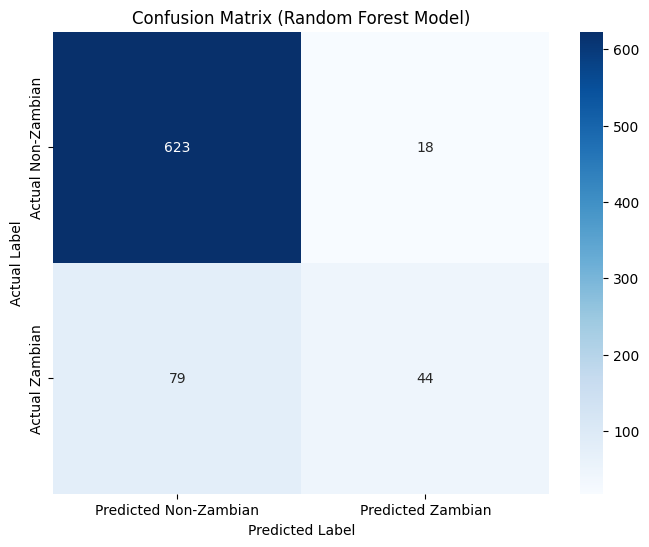

In [150]:
# Visualizing New Model Errors

print("--- Visualizing new model errors with a confusion matrix ---")

# Generate the confusion matrix for the new predictions
cm2 = confusion_matrix(y2_test, y2_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Non-Zambian', 'Predicted Zambian'],
            yticklabels=['Actual Non-Zambian', 'Actual Zambian'])
plt.title('Confusion Matrix (Random Forest Model)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

This is a critical step. We will now inspect the feature importances of the Random Forest model. Our goal is to see a more balanced contribution from all the behavioral features. A successful outcome would show features like `edit_hour` and `text_length` having high importance, proving our new model has learned the nuanced patterns we intended it to.


--- Interpreting Random Forest feature importance ---


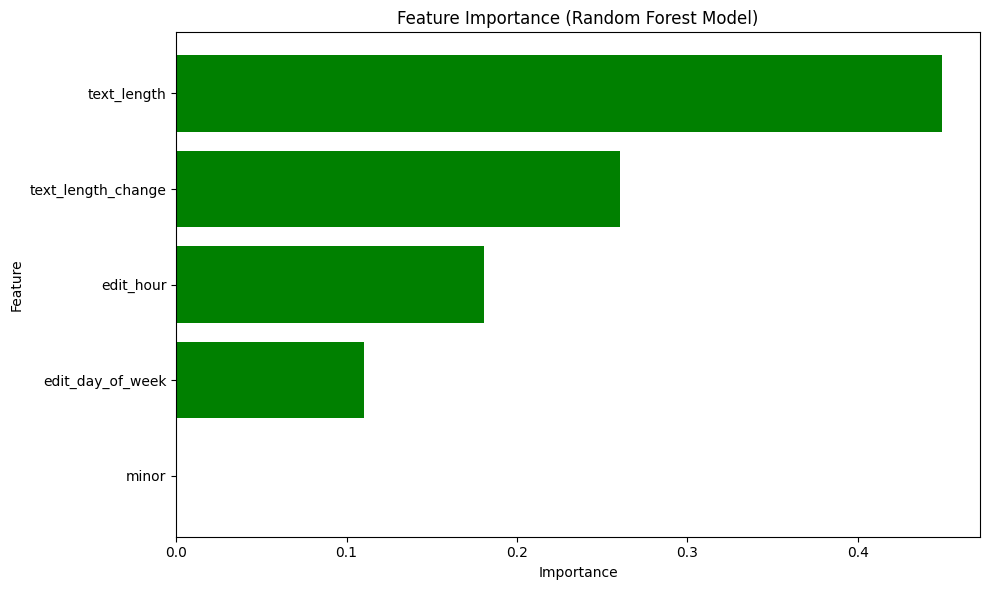

In [151]:

# Interpreting New Model Logic

print("--- Interpreting Random Forest feature importance ---")

# Extract feature importances from the trained Random Forest model
importances2 = rf_model.feature_importances_

# Create a DataFrame for plotting
feature_importance_df2 = pd.DataFrame({
    'feature': feature_cols2,  # Using the new feature_cols list (without is_ip_user)
    'importance': importances2
}).sort_values('importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df2['feature'], feature_importance_df2['importance'], color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Random Forest Model)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Finally, we will conduct an error analysis on the new model's mistakes and write a final, comparative evaluation. We need to know *what kind* of errors this new model makes. Are they different from the first model's errors? This analysis will lead into a comprehensive summary comparing the two models and concluding which model is better.

In [152]:
# Error Analysis of the New Model

print("--- Performing Error Analysis on the Random Forest Model ---")

# Create a results DataFrame with the test features, actual labels, and new predictions
results_df2 = X2_test.copy()
results_df2['actual'] = y2_test
results_df2['predicted'] = y2_pred

# Find all the rows where the new model was wrong
misclassified2 = results_df2[results_df2['actual'] != results_df2['predicted']]

print(f"The new model misclassified a total of {len(misclassified2)} edits.")

# Analyze the characteristics of the errors to see if there are any patterns
print("\nCharacteristics of Misclassified Edits:")
print(misclassified2.describe())



--- Performing Error Analysis on the Random Forest Model ---
The new model misclassified a total of 97 edits.

Characteristics of Misclassified Edits:
       minor    text_length  edit_hour  edit_day_of_week  text_length_change  \
count   97.0      97.000000  97.000000         97.000000           97.000000   
mean     0.0   52685.917526  12.278351          3.175258          152.711340   
std      0.0   50964.094600   6.422198          2.106588          406.152603   
min      0.0     259.000000   0.000000          0.000000         -477.000000   
25%      0.0   13393.000000   8.000000          1.000000            0.000000   
50%      0.0   28895.000000  13.000000          3.000000           12.000000   
75%      0.0   75698.000000  17.000000          5.000000           86.000000   
max      0.0  204334.000000  23.000000          6.000000         2217.000000   

          actual  predicted  
count  97.000000  97.000000  
mean    0.814433   0.185567  
std     0.390776   0.390776  
min     

## Final Comparative Evaluation
### Overall Performance Comparison:
- Our new Random Forest model achieved an accuracy of 87.30%, compared to 93.59% from the original Decision Tree.
-	Based on this primary metric, the new model is slightly less accurate.

### Detailed Performance Analysis:
-Classification Report: The precision for identifying Zambian contributors is now 0.71, and the recall is 0.36. The F1-score of 0.48 for the Zambian class is lower than the original model’s 0.79. This indicates the new model is worse at correctly identifying Zambian editors.
-	Confusion Matrix: The new model produced 18 False Positives and 79 False Negatives. This is a decline from the first model which had 21 and 28 respectively (slightly fewer FPs but many more FNs).


### Key Drivers of Predictions (Model Logic):
-	The new feature importance chart shows that text_length (≈0.45) is now the most important predictor, followed by text_length_change (≈0.26), edit_hour (≈0.18), and edit_day_of_week (≈0.11); minor has ~0 importance.
-	Unlike the first model (dominated by is_ip_user), importances are more evenly distributed across multiple features, indicating a shift away from reliance on a single signal.


### Error Analysis Insights:
-	The model’s mistakes are now concentrated mostly on False Negatives: 79 of 97 misclassifications (~81%) are actual Zambian edits predicted as Non Zambian, reflecting the low recall for class 1.
-	Misclassified edits tend to occur around midday (mean edit_hour ≈ 12.28), on mid week days (mean day_of_week ≈ 3.18), with longer articles (mean text_length ≈ 52.7k) and small positive changes (median text_length_change ≈ 12, many near zero).

### Conclusion: Was the Re Modeling Successful?
-	Partially. The re modeling reduced dependence on a single feature and slightly lowered False Positives, but overall accuracy dropped and recall for Zambian edits fell sharply. If the goal is better identification of Zambian editors, this version is not an improvement.


# **5. Deployment**

After a thorough and iterative evaluation process involving two different modeling strategies, we have selected our **first model, the Decision Tree Classifier (`dt_model`)**, for the final deployment. This model was chosen because it proved to be the most effective at achieving the project's primary objectives.

The justification for selecting the Decision Tree is based on its superior performance on our project's key success criteria:

*   **Superior Performance on the Main Objective:** The primary goal is to identify Zambian contributors. The Decision Tree achieved a much higher F1-score (**0.79**) and recall (**77%**) for the Zambian class compared to the Random Forest (0.48 F1-score, 36% recall). This means it is significantly better at finding Zambian edits.

*   **Higher Overall Accuracy:** The Decision Tree's overall accuracy of **93.59%** was substantially higher than the Random Forest's **87.30%**.

While the model has a known limitation (heavy reliance on `is_ip_user`), its real-world performance on our test data was demonstrably better.

